In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [3]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

In [4]:
# GENERATE DATA
sample_size = 150
x = np.random.rand(sample_size)
y = np.random.rand(sample_size)
data = np.vstack([x, np.ones(sample_size)]).T

In [6]:
model = BaggingRegressor(LinearRegression(), n_estimators = 1000, bootstrap = True)
model.fit(data, y)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

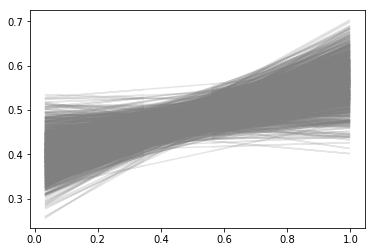

In [8]:
for estimator in model.estimators_ :
    predicted = estimator.predict(data)
    plt.plot(x, predicted, color = 'grey', alpha = 0.2, zorder = 1)

In [15]:
def mean_confidence_interval(data, confidence_percent = 0.95):
    data = 1.0 * np.array(data)
    size = len(data)
    m = np.mean(data)
    se = scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 * confidence_percent) / 2., size - 1)
    return m, m - h, m + h


In [16]:
print("Confidence interval with confidence of 95% is : ", mean_confidence_interval(data))

Confidence interval with confidence of 95% is :  (0.7393799646488298, array([0.74082247, 0.73937996]), array([0.73793746, 0.73937996]))
